In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.applications.resnet_v2 import ResNet152V2,preprocess_input,decode_predictions
from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input,decode_predictions
# from keras.applications.efficientnet_v2 import EfficientNetV2S,preprocess_input,decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hager\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [10]:
# from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 

In [5]:
model = load_model('CNNmodel2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
def CNN(dir_path):
    img= load_img ( dir_path, target_size = ( 200,200 ) )
    plt.imshow( img ) 
    plt.show()
    X = img_to_array(img )
    X = np.expand_dims ( X , axis = 0 )
    images = np.vstack ( [ X ] )
    val= model.predict ( images )
    if val == 0 : 
        return " Bird "  
    else : 
        return " Human " 

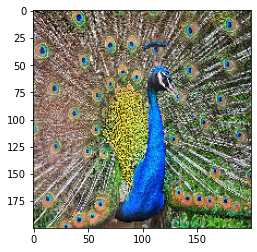

' Bird '

In [7]:
dir_path ='database/test/4.jpg'
CNN(dir_path)

In [8]:
def IncepV3(y):
    model = InceptionV3()
    image = load_img(y, target_size=(299, 299, 3))
    image = img_to_array(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = preprocess_input(image)
    y = model.predict(image)
    label = decode_predictions(y)
    print(label),
    label = label[0][0]

    # print classification
    return f"{(label[1], label[2] * 100)}"

def ResNetV2(y):
    model = ResNet152V2()
    image = load_img(y, target_size=(224, 224, 3))
    image = img_to_array(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = preprocess_input(image)
    y = model.predict(image)
    label = decode_predictions(y)
    print(label)
    label = label[0][0]

    # print classification
    return f"{(label[1], label[2] * 100)}"


def IncepResNetV2(y):
    model = InceptionResNetV2()
    image = load_img(y, target_size=(299, 299))
    image = img_to_array(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = preprocess_input(image)
    y = model.predict(image)
    label = decode_predictions(y)
    print(label)
    label = label[0][0]

    # print classification
    return f"{(label[1], label[2] * 100)}"


def VGG(y):
    model = VGG16()
    image = load_img(y, target_size=(224, 224, 3))
    image = img_to_array(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = preprocess_input(image)
    y = model.predict(image)
    label = decode_predictions(y)
    print(label)
    label = label[0][0]

    # print classification
    return f"{(label[1], label[2] * 100)}"



In [ ]:
import io
import os
import PySimpleGUI as sg
from PIL import Image



file_types = [
    ("JPEG (*.jpg)", "*.jpg"),
    ("all files (*.*)", "*.*")

]

layout = [
    [sg.Image(key="-IMAGE-")],
    [
        sg.Text("Image file"),
        sg.Input(size=(25, 1), key="-FILE-"),
        sg.FileBrowse(file_types=file_types),
        sg.Button("Load Image")
    ],
    [
        sg.Button("vgg16"),
        sg.Button("InceptionV3"), 
        sg.Button("ResNet152V2"),
        sg.Button("InceptionResNetV2"),
        sg.Button("CNN Model")
    ],
    [   sg.Text("OUTPUT OF vgg16 : "), sg.Text(key="-RESULT1-")],
    [   sg.Text("OUTPUT OF InceptionV3 : "),sg.Text(key="-RESULT3-")],
    [   sg.Text("OUTPUT OF ResNet152V2 : "),sg.Text(key="-RESULT4-")],
    [   sg.Text("OUTPUT OF InceptionResNetV2 : "),sg.Text(key="-RESULT5-")],
    [   sg.Text("CNN Model (Human or bird) : "),sg.Text(key="-RESULT6-")],
]

window = sg.Window("Image viewer", layout)

while True:
   
    event, values = window.read()
    if event == "Exit" or event == sg.WIN_CLOSED:
        break

    if event == "Load Image":
        filename = values["-FILE-"]
        if os.path.exists(filename):
            image = Image.open(values["-FILE-"])
            image.thumbnail((400, 400))
            bio = io.BytesIO()
            image.save(bio, format="PNG")
            window["-IMAGE-"].update(data=bio.getvalue())

    if event == "vgg16":
        window["-RESULT1-"].update(VGG(filename))
    elif event == "InceptionV3":
         window["-RESULT5-"].update(IncepV3(filename))
    elif event == "ResNet152V2":
         window["-RESULT4-"].update(ResNetV2(filename))
    elif event == "InceptionResNetV2":
         window["-RESULT3-"].update(IncepResNetV2(filename))
    elif event == "CNN Model":
         window["-RESULT6-"].update(CNN(filename))
    
        
window.close()
